## Table of Contents

 1. [Imports](#Imports)
 2. [Reading Data](#Reading-Data)
 3. [Preprocessing](#Preprocessing)
 4. [Set up our data for modeling](#Set-up-our-data-for-modeling)
     1. [Final Model](#Final-Model)
 5. [Model Analysis](#Model-Analysis)
     1. [Compiled Scores](#Compiled-Scores)
     1. [Confusion Matrix](#Confusion-Matrix)

### Imports

In [22]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from matplotlib import pyplot as plt



%matplotlib inline 

### Reading Data

In [2]:
df = pd.read_csv('clean_df.csv')
df.head(10)

,content,coordinates,type,target,latitude,longitude
0,usgs reports a m earthquake km ese of beatty ...,"{'longitude': -116.2717, 'latitude': 36.7641}",earthquake,0,36.764100,-116.271700
1,usgs reports a m1 earthquake km wnw of smiths...,"{'longitude': -116.1626667, 'latitude': 44.3195}",earthquake,0,44.319500,-116.162667
2,usgs reports a m earthquake km nw of indian s...,"{'longitude': -116.0749, 'latitude': 36.7963}",earthquake,0,36.796300,-116.074900
3,usgs reports a m11 earthquake km ssw of markl...,"{'longitude': -119.8126, 'latitude': 38.6329}",earthquake,0,38.632900,-119.812600
4,moffshore valparaiso chile depth km may 9 1 u...,"{'longitude': -71.84, 'latitude': -32.51}",earthquake,0,-32.510000,-71.840000
5,usgs reports a m earthquake km wsw of cold sp...,"{'longitude': -120.072, 'latitude': 39.6527}",earthquake,0,39.652700,-120.072000
6,usgs reports a m19 earthquake km wnw of stanl...,"{'longitude': -115.1751667, 'latitude': 44.2765}",earthquake,0,44.276500,-115.175167
7,usgs reports a m11 earthquake km nnw of gabbs...,"{'longitude': -118.1133, 'latitude': 39.3157}",earthquake,0,39.315700,-118.113300
8,i wanna move out of the #usa but if shit goes ...,"{'longitude': -87.940033, 'latitude': 41.644102}",earthquake,1,41.644102,-87.940033
9,usgs reports a m earthquake km nw of stanley ...,"{'longitude': -115.2083333, 'latitude': 44.3585}",earthquake,0,44.358500,-115.208333


In [3]:
# double checking for nulls
df.isnull().sum()

content        0
coordinates    0
type           0
target         0
latitude       0
longitude      0
dtype: int64

In [5]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    lemma_words =''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words

In [6]:
df['content'] = df['content'].apply(lemmatize_words)

In [8]:
#Most Frequently used words _ Danger

count_vect = CountVectorizer(analyzer="word", tokenizer = None, preprocessor = None, stop_words = "english", ngram_range=(1,1))

# Netflix CountVectorizer 

df_twitter_words_danger = df[df['target'] == 1]['content']

# fit_transform the vectorizer

twitter_words_d = count_vect.fit_transform(df_twitter_words_danger)

#Convert output to Numpy Array

twitter_words_d = twitter_words_d.toarray()




In [9]:
twitter_w_cloud = count_vect.get_feature_names()

print(twitter_w_cloud)

['11', '111amplified', '119', '11a11p', '11mph', '11th', '19', '1911', '199', '1999', '1999191', '19s', '19stoday', '1evanstewart', '1ft', '1hrs', '1k', '1kilometers', '1km', '1m', '1michael', '1mph', '1newsnow', '1pm', '1pmpm', '1st', '1tampabay', '1year', '91', '911', '99', '99fm', '9am', '9mbs', '9mph', '9pm', '9th', 'aa', 'aarn', 'aaronparnas', 'abandoning', 'abbeville', 'abbott', 'abbotts', 'abc', 'abc11wtvd', 'abc1news', 'abc1newssydweather', 'abcchicago', 'abel', 'abilene', 'ability', 'able', 'abomb', 'abomination', 'abortion', 'absolute', 'absolutely', 'abusive', 'academy', 'accept', 'acceptable', 'access', 'accident', 'accompanied', 'accomplish', 'according', 'account', 'accurate', 'acevandeuce', 'achucksnake', 'acme', 'acre', 'act', 'actahoops', 'action', 'actionvote', 'activate', 'activated', 'active', 'actively', 'activity', 'actual', 'actually', 'acuoutrunners', 'acyn', 'ad', 'adafriendly', 'adam', 'adamluciowx', 'adapting', 'add', 'added', 'addicted', 'adding', 'addison',

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
top_100 = pd.DataFrame(twitter_words_d, columns= count_vect.get_feature_names())

twitter_words = top_100.sum().sort_values(ascending=False).head(50)

twitter_words.index


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['tornado', 'warning', 'pm', 'flood', 'edt', 'nc', 'report', 'wa',
       'including', 'cdt', 'va', 'storm', 'continues', 'county', 'watch',
       'drill', 'flash', 'just', 'amp', 'near', 'hurricane', 'like', 'day',
       'ha', 'earthquake', 'weather', 'delayed', 'nw', 'im', 'road', 'sc',
       'time', 'school', 'wind', 'survey', 'ky', 'today', 'flooding', 'water',
       'tx', 'north', 'dont', 'need', 'public', 'ia', 'west', 'gun', 'il',
       'area', '11'],
      dtype='object')

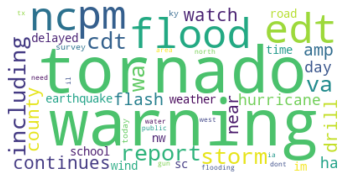

In [29]:
#preparing Word Cloud for most frequent words

t_w_pic = list(twitter_words.index)
text =" ".join(t_w_pic)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("Twitter_emergency_words.jpg", dpi=2400)


In [30]:
#Most Frequently used words _ Danger

count_vect = CountVectorizer(analyzer="word", tokenizer = None, preprocessor = None, stop_words = "english", ngram_range=(1,1))

# Netflix CountVectorizer 

df_twitter_words_danger = df[df['target'] == 0]['content']

# fit_transform the vectorizer

twitter_words_d = count_vect.fit_transform(df_twitter_words_danger)

#Convert output to Numpy Array

twitter_words_d = twitter_words_d.toarray()



In [31]:
twitter_w_cloud = count_vect.get_feature_names()

print(twitter_w_cloud)

['11', '111', '1111', '11111', '1119', '119', '1191', '1199', '11cfs', '11km', '11mi', '19', '191', '199', '1991', '19km', '1b', '1ft', '1ftflow', '1km', '1malaysia', '1mi', '1t1', '1t11', '1t111', '1t1111', '1z', '91', '919', '9191', '91919', '99', '999', '9km', '9mi', '9t', '9t11', '9t19', '9t9', 'aaustinboi', 'abowt', 'abraxsys', 'absolute', 'absolutely', 'abuse', 'acajutla', 'access', 'accommodate', 'according', 'acre', 'act', 'acting', 'action', 'active', 'actually', 'add', 'additionally', 'administration', 'admire', 'admiring', 'adopted', 'adultswim', 'adultswimnocon', 'adultswimooc', 'aewdark', 'aewdon', 'aewrampage', 'affinitybsc', 'affordability', 'afraid', 'aftershock', 'age', 'aging', 'ago', 'agotwenty', 'agsturm', 'aguadilla', 'aguanga', 'aguililla', 'aint', 'air', 'airbagann', 'airline', 'alainaliberty', 'alamo', 'alanhawxbymd', 'alaska', 'alberta', 'alberto', 'alcohol', 'alerta', 'algorithm', 'alive', 'allegation', 'almagro', 'almighty', 'alt', 'alta', 'alum', 'amazing', 

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
top_100 = pd.DataFrame(twitter_words_d, columns= count_vect.get_feature_names())

twitter_words = top_100.sum().sort_values(ascending=False).head(50)

twitter_words.index

Index(['earthquake', 'utc', 'km', 'usgs', 'report', 'ca', 'm1', 'magnitude',
       '1km', '11', 'nevada', '19', 'occured', 'nw', 'state', 'united',
       'reviewed', 'geyser', 'se', 'm11', 'ne', 'ese', 'wnw', 'ene', 'm9',
       'ssw', 'mi', 'nnw', 'wsw', 'occurred', 'cobb', 'lake', 'ml', 'sse',
       'sw', 'wa', 'nne', 'map', '111', 'unitedstates', 'spring', 'city',
       'mina', 'san', 'puerto', 'm19', 'chile', 'emsc', 'sutcliffe', 't1'],
      dtype='object')

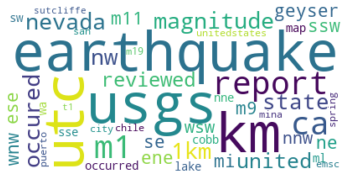

In [33]:
#preparing Word Cloud for most frequent words

t_w_pic = list(twitter_words.index)
text =" ".join(t_w_pic)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("Twitter_non_emergency_words.jpg", dpi=2400)

In [21]:
# Visualization of most frequent words for the natural disaster
def bar_graph(df, title):
    plt.figure(figsize = (8, 8))
    (df.sum().sort_values(ascending=False)[0:10]).plot(kind = 'barh', color='cornflowerblue')
    plt.xlabel('Frequency', size = 15)
    plt.ylabel('Words', size = 15)
    plt.yticks(size = 15)
    plt.title(title, size = 15);

bar_graph(twitter_words_d, 'Most Common Words in Non-Urgent Tweets')

AttributeError: 'numpy.int64' object has no attribute 'sort_values'

<Figure size 576x576 with 0 Axes>

### Preprocessing

We're going to create a custom list of stop words so we can remove some of the words that were showing up in both of our positive and negative classes. These include the words that were originally used to scrape the posts from Twitter, so obviously they would be in every one of our posts.

In [4]:
stop_words = list(_stop_words.ENGLISH_STOP_WORDS)
print(stop_words)

['everything', 'something', 'whoever', 'she', 'someone', 'interest', 'up', 'even', 'thereupon', 'should', 'yet', 'without', 'fifty', 'if', 'were', 'when', 'front', 'per', 'hundred', 'thick', 'became', 'below', 'anyway', 're', 'could', 'a', 'their', 'fill', 'less', 'eleven', 'off', 'fire', 'among', 'then', 'before', 'whom', 'since', 'himself', 'so', 'mostly', 'well', 'again', 'hence', 'sometime', 'whereas', 'back', 'cannot', 'every', 'con', 'everywhere', 'least', 'seems', 'take', 'go', 'call', 'five', 'was', 'found', 'co', 'is', 'name', 'while', 'nevertheless', 'wherever', 'between', 'though', 'towards', 'hers', 'get', 'very', 'yours', 'already', 'we', 'herein', 'whereafter', 'may', 'hereby', 'they', 'will', 'side', 'seemed', 'than', 'because', 'much', 'formerly', 'these', 'ie', 'anywhere', 'us', 'besides', 'made', 'top', 'too', 'amoungst', 'been', 'any', 'i', 'over', 'how', 'where', 'move', 'being', 'many', 'amount', 'eg', 'also', 'beyond', 'whole', 'elsewhere', 'done', 'own', 'whither

### Set up our data for modeling
- `X` will be the `content` column.
- `y` will be the `target` column

In [5]:
X= df["content"]
y= df["target"]


In [6]:
df['target'].value_counts(normalize=True)

0    0.577872
1    0.422128
Name: target, dtype: float64

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, stratify=y)

### Model_1:

In [8]:
# Let's set it up with two stages:
# 1. An instance of CountVectorizer (transformer)
# 2. A LogisticRegression instance (estimator)

pipe= Pipeline([('cvec',CountVectorizer()),

                ('lr', LogisticRegression())])

In [9]:
pipe_params = {'cvec__max_features': [1000,4000,6000],
              'cvec__min_df' :[2,3],
               'cvec__max_df' :[0.95,0.98],
               'cvec__ngram_range' :[(1,1),(1,2),(1,3)]
              }

In [10]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid = pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [11]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.95, 0.98],
                         'cvec__max_features': [1000, 4000, 6000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [12]:
# What's the best score?
gs.best_score_


0.9745207792613902

In [13]:
# Save best model as gs_model.
#Pipeline(steps=[('cvec',
                # CountVectorizer(max_df=0.95, max_features=4000, min_df=2)),
                #('lr', LogisticRegression())])
gs_model = gs.best_estimator_
gs_model

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.95, max_features=6000, min_df=2,
                                 ngram_range=(1, 3))),
                ('lr', LogisticRegression())])

In [14]:
# Score model on training set.
print(gs_model.score(X_train, y_train))

# Score model on testing set.
print(gs_model.score(X_test, y_test))

0.9978768577494692
0.9734888653234358


In [15]:
predictions_CV = gs_model.predict(X_test)

In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions_CV).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 535
False Positives: 10
False Negatives: 15
True Positives: 383


### Model_2:

In [17]:
pipe_1= Pipeline([('tvec', TfidfVectorizer()),

                ('lr', LogisticRegression())])

In [18]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 1000, 4000, 6000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 95%, 98%
# Check (individual tokens) and also check (individual tokens and bigrams).


pipe_params_1= {
            'tvec__stop_words' : [None, 'english'],
            'tvec__ngram_range' : [(1,1), (1,2), (1,3)],
            'tvec__max_df' : [.95, 0.98],
            'tvec__min_df' : [2, 3],
            'tvec__max_features' : [1000, 4000, 6000]
}

In [19]:
# Instantiate GridSearchCV.

gs_1= GridSearchCV(pipe_1, # what object are we optimizing?
                  param_grid =pipe_params_1 , # what parameters values are we searching?
                  cv=5, n_jobs=-1, verbose=1) # 5-fold cross-validation.

In [20]:
gs_1.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'tvec__max_df': [0.95, 0.98],
                         'tvec__max_features': [1000, 4000, 6000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [21]:
# What's the best score?
gs_1.best_score_

0.9525820069420557

In [22]:
# Save best model as gs_model.
#Pipeline(steps=[('tvec',
                # TfidfVectorizer(max_df=0.95, max_features=4000, min_df=2)),
                #('lr', LogisticRegression())])
gs_model_1 = gs_1.best_estimator_
gs_model_1

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.95, max_features=1000, min_df=2,
                                 ngram_range=(1, 3), stop_words='english')),
                ('lr', LogisticRegression())])

In [23]:
# Score model on training set.
print(gs_model_1.score(X_train, y_train))

# Score model on testing set.
print(gs_model_1.score(X_test, y_test))

0.9766454352441614
0.9490986214209968


In [24]:
predictions_1 = gs_model.predict(X_test)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions_1).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 535
False Positives: 10
False Negatives: 15
True Positives: 383


### Model_3: BernoulliNB , MultinomialNB, GaussianNV

In [26]:
#Instantiate our CountVectorizer.
cvec_1 = CountVectorizer(max_features=4000, stop_words=stop_words)

In [27]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec =cvec_1.fit_transform(X_train)

In [28]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_cvec = cvec_1.transform(X_test)

### BernoulliNB

In [29]:
# Instantiate our model!

bnb = BernoulliNB()

In [30]:
# Fit our model!

bnb.fit(X_train_cvec, y_train)

BernoulliNB()

In [31]:
score=cross_val_score(bnb, X_train_cvec, y_train, cv=5).mean()
score

0.9345339128803278

In [32]:
# Generate our predictions!

predictions = bnb.predict(X_test_cvec)

In [33]:
# Score our model on the training set.

print(bnb.score(X_test_cvec, y_test))

# Score our model on the testing set.
print(bnb.score(X_train_cvec, y_train))

0.9289501590668081
0.9564755838641189


In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 488
False Positives: 57
False Negatives: 10
True Positives: 388


### MultinomialNB

In [35]:
# Similarly Multinomial NB
mnb = MultinomialNB()

mnb.fit(X_train_cvec, y_train)

pred_multinomial = mnb.predict(X_test_cvec)

print(mnb.score(X_train_cvec, y_train))

print(mnb.score(X_test_cvec, y_test))

0.9610757254069356
0.9247083775185578


In [36]:
score=cross_val_score(mnb, X_train_cvec, y_train, cv=5).mean()
score

0.9306426092122955

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_multinomial).ravel()
print(f"True Negatives: {tn}")
print(f"Fale Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 482
Fale Positives: 63
False Negatives: 8
True Positives: 390


### GaussianNB

In [38]:
gnb = GaussianNB()

gnb.fit(X_train_cvec.todense(), y_train)

pred_gnb = gnb.predict(X_test_cvec.todense())

print(gnb.score(X_train_cvec.todense(), y_train))

print(gnb.score(X_test_cvec.todense(), y_test))

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.9989384288747346
0.9353128313891834


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [39]:
score=cross_val_score(gnb, X_train_cvec.todense(), y_train, cv=5).mean()
score

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Applic

0.9239200725476093

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_gnb).ravel()
print(f"True Negatives: {tn}")
print(f"Fale Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 501
Fale Positives: 44
False Negatives: 17
True Positives: 381


## RandomForest - Model  4

In [41]:
# Model Instantiation
# Create an instance of RandomForestClassifier and ExtraTreesClassifier.

rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [42]:
#Model Evaluation for rf and et
cross_val_score(rf,X_train_cvec,y_train, cv=10).mean()

0.9628423928025462

In [43]:
#Model Evaluation for rf and et
cross_val_score(et,X_train_cvec,y_train, cv=10).mean()

0.9582399819562439

In [44]:
rf_params = {
    'n_estimators': [50,75,100,500],
    'max_depth': [10,15,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,3,5]
}

In [45]:
# GridSearch

gs3= GridSearchCV(estimator = RandomForestClassifier(random_state = 42),param_grid=rf_params, cv=10, verbose=1, n_jobs=-1)

gs3.fit(X_train_cvec,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 30],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 100, 500]},
             verbose=1)

In [46]:
# Best Score

gs3.best_score_

0.936300528782297

In [47]:
# Best Parameters
gs3.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [48]:
# Assigning to best_estimators
best_rf = gs3.best_estimator_

In [49]:
# fit train data
best_rf.fit(X_train_cvec, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=500,
                       random_state=42)

In [50]:
# Score
print(best_rf.score(X_train_cvec, y_train))

# Test Score
print(best_rf.score(X_test_cvec, y_test))

0.9483368719037509
0.9183457051961824


In [51]:
pred_rf = best_rf.predict(X_test_cvec.todense())

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_rf).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 475
False Positives: 70
False Negatives: 7
True Positives: 391


### Support Vector Machine - Model 5

In [53]:
# Instantiate support vector machine.
svc = SVC()

In [54]:
# Fit support vector machine to training data.
svc.fit(X_train_cvec, y_train)


SVC()

In [55]:
# Generate predictions.

y_pred = svc.predict(X_test_cvec)

In [56]:
# Measure performance based on accuracy.
svc.score(X_train_cvec, y_train)

0.9922151450813871

In [57]:
# Mesure of test score
svc.score(X_test_cvec, y_test)

0.9639448568398727

In [58]:
# Create DataFrame with column for predicted values.
results = pd.DataFrame(svc.predict(X_test_cvec), columns=['predicted'])

# Create column for observed values.
results['actual'] = y_test
results

,predicted,actual
0,0,NaN
1,1,0.0
2,1,NaN
3,0,NaN
4,1,0.0
...,...,...
938,0,0.0
939,0,NaN
940,0,NaN
941,0,NaN


In [59]:
svm_params = {
    'kernel':['linear','rbf','polynomial']
}

In [60]:
gs5= GridSearchCV(estimator = SVC(random_state = 42),param_grid=svm_params, cv=10, verbose=1, n_jobs=-1)

gs5.fit(X_train_cvec,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 342, in _sparse_fit
    kernel_type 

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf', 'polynomial']}, verbose=1)

In [61]:
# Best Score

gs5.best_score_

0.9670914467583891

In [62]:
# Best Parameters
gs5.best_params_

{'kernel': 'linear'}

In [63]:
# Assigning to best_estimators
best_svm = gs5.best_estimator_

In [64]:
# fit train data

best_svm.fit(X_train_cvec, y_train)

SVC(kernel='linear', random_state=42)

In [65]:
# Score
best_svm.score(X_train_cvec, y_train)

0.9996461429582448

In [66]:
# test Score
best_svm.score(X_test_cvec, y_test)

0.9671261930010604

In [67]:
pred_svm = best_svm.predict(X_test_cvec.todense())

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_svm).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 537
False Positives: 8
False Negatives: 23
True Positives: 375
